# 估计
- 均方误差MSE(mean square error):$MSE=\frac{1}{m}\sum{(\bar{x}-\mu)^2}$

从一个正态分布中得到随机样本，需要估计分布的均值$\mu$，方法一：通过样本均值$\bar{x}$估计，方法二：通过中位数估计。

- 最大似然估计MLE(maximum likelihood estimator)：做出最可能与实际值相符的估计。

In [5]:
%matplotlib inline
from __future__ import print_function, division

import numpy as np
import pandas
import random
import math
import thinkstats2
import thinkplot
import nsfg

In [6]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def Estimate1(n=7, m=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
Estimate1()

Experiment 1
rmse xbar 0.378286299698
rmse median 0.460603202415


## 猜测方差
- $S^2=\frac{1}{n}\sum(x_i-\bar{x})^2$
- $S_{n-1}^2=\frac{1}{n-1}\sum(x_i-\bar{x})^2$
- 对于小样本，$S^2$通常比方差分布低很多，称其为偏倚（biased）估计量，$S_{n-1}^2$预期误差总和为0，是无偏的（unbiased）。

In [7]:
def Estimate2(n=7, m=1000):
    """Evaluates S and Sn-1 as estimators of sample variance.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
Estimate2()

Experiment 2
mean error biased -0.139176738225
mean error unbiased 0.00429380540391


## 抽样分布
- 抽样误差（sampling error）：由随机选择导致的估计变化。
- 估计量的抽样分布（sampling distribution）：在野生动物保护区研究大猩猩，想知道保护区成年雌性大猩猩的平均体重。mu和sigma是参数的假定值，n是样本大小，m是运行模拟的次数。在每次循环中，我们从具有给定参数的正态分布中选择n个值，计算样本均值xbar。代码进行1000次模拟，然后计算估计值分布的CDF。这个分布称为估计量的抽样分布（sampling distribution）。
- 通常用2种方法对抽样分布进行概括：
    - 标准误差SE（standard error）：对每次模拟实验，先计算误差$\bar{x}-\mu$，然后计算均方根误差，即得到标准误差。
    - 置信区间CI（confidential interval）：包含抽样分布中指定比例的范围。例如90%置信区间是从第5百分位数到第95百分位数。

standard error 2.46158105111
confidence interval (85.941757107563404, 93.997967523500975)


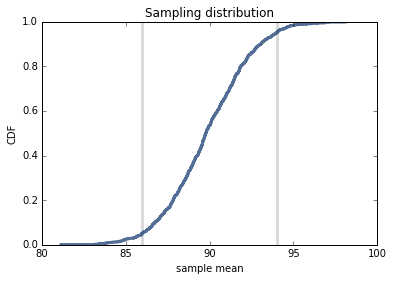

In [9]:
def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    """Plots the sampling distribution of the sample mean.

    mu: hypothetical population mean
    sigma: hypothetical population standard deviation
    n: sample size
    m: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    means = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)

    stderr = RMSE(means, mu)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(root='estimation1',
                   xlabel='sample mean',
                   ylabel='CDF',
                   title='Sampling distribution')
SimulateSample()

## 抽样偏倚
- 抽样偏倚（sampling bias）
- 测量误差（measurement error）

## 指数分布
给定一个指数分布的样本，猜测分布的参数$\lambda$是多少？

- 估计量L：指数分布的均值是$1/\lambda$，选择$L=1/\bar{x}$。它是最大似然估计。
- 估计量Lm：当存在离群点时，$\bar{x}$不是很健壮，选择基于样本的中位数，指数分布的中位数是$In(2)/\lambda$，则$L_m=In(2)/m$，m是样本的中位数。
- 以$\lambda=2$运行实验，发现L略好于Lm。不幸的是，两个估计量似乎都是偏倚的，L的均值误差为0.37，Lm的均值误差为0.49，而且随着样本量m的增加，二者的均值误差都不会趋近于0。

In [10]:
def Estimate3(n=7, m=1000):
    """Evaluates L and Lm as estimators of the exponential parameter.

    n: sample size
    m: number of iterations
    """
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

    print('Experiment 3')
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
Estimate3()

Experiment 3
rmse L 1.09048555263
rmse Lm 1.75280482928
mean error L 0.348657804698
mean error Lm 0.388103019994
